In [3]:
from main import *
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_algorithms import AdaptVQE
import time as time_module
%matplotlib widget


def get_current_directory():
    try:
        
        directory = os.path.dirname(os.path.abspath(__file__))

    except:
        
        ip = IPython.get_ipython()
        directory = None
        if '__vsc_ipynb_file__' in ip.user_ns:
            directory = os.path.dirname(ip.user_ns['__vsc_ipynb_file__'])
        
    return directory 


def salvar(a):
    
    script_dir = get_current_directory()
    
    dados_dir = os.path.join(script_dir, 'dados')
    
    os.makedirs(dados_dir, exist_ok=True)
    
    file_path = os.path.join(dados_dir, f'{a}.pickle')
    
    with open(file_path, 'wb') as f:
        pickle.dump(eval(a), f)

def abrir(a):
    
    script_dir = get_current_directory()
    
    file_path = os.path.join(script_dir, 'dados', f'{a}.pickle')
    
    with open(file_path, 'rb') as f:
        return pickle.load(f)
    
def salvar_obj(obj, filename):
    script_dir = get_current_directory()
    dados_dir = os.path.join(script_dir, 'dados')
    os.makedirs(dados_dir, exist_ok=True)
    
    file_path = os.path.join(dados_dir, f'{filename}.pickle')
    
    with open(file_path, 'wb') as f:
        pickle.dump(obj, f)

In [15]:
# Codigo Lucas 

driver = PySCFDriver(atom="O 0 0 -1.16; C 0 0 0; O 0 0 1.16", basis="sto-6g")

es_problem_co2 = driver.run()

espaco_target_mid = ActiveSpaceTransformer(8,8) 

espaco_target_minimal = ActiveSpaceTransformer(4,4) 

estrutura_mid = espaco_target_mid.transform(es_problem_co2) 

estrutura_minimal = espaco_target_minimal.transform(es_problem_co2)

op_i = es_problem_co2.hamiltonian.second_q_op()
op_mid = estrutura_mid.hamiltonian.second_q_op()
op_minimal = estrutura_minimal.hamiltonian.second_q_op()

mapa_default = es_problem_co2.get_tapered_mapper(BravyiKitaevMapper())
mapa_mid = estrutura_mid.get_tapered_mapper(BravyiKitaevMapper())
mapa_minimal = estrutura_minimal.get_tapered_mapper(BravyiKitaevMapper())

obs_tapered_default = mapa_default.map(op_i)
obs_tapered_mid = mapa_mid.map(op_mid)
obs_tapered_minimal = mapa_minimal.map(op_minimal)


for a in ["minimal", "mid"]:
    
    time = time_module.time()
    
    ansatz = UCCSD(
        eval(f'estrutura_{a}.num_spatial_orbitals'),
        eval(f'estrutura_{a}.num_particles'),
        eval(f'mapa_{a}'),
        initial_state=HartreeFock(
            eval(f'estrutura_{a}.num_spatial_orbitals'),
            eval(f'estrutura_{a}.num_particles'),
            eval(f'mapa_{a}'))
    )

    vqe_solver = VQE_algorithms(Estimator_Aer(), ansatz, SLSQP())
    
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters
    
    calculo = GroundStateEigensolver(eval(f'mapa_{a}'), vqe_solver)
    
    #resultados = calculo.solve(eval(f'estrutura_{a}'))
    minimum_eigenvalue = vqe_solver.compute_minimum_eigenvalue(calculo.get_qubit_operators(estrutura_minimal)[0])
    
    #salvar_obj(resultados, f'resultado_co2_{a}')
    salvar_obj(minimum_eigenvalue, f'minimum_eigenvalue_co2_{a}')
    
    time = time_module.time() - time
    
    print(f'Finalizado {a} em {time} segundos')

Finalizado minimal em 436.16253447532654 segundos


QiskitError: "Left and right compose dimensions don't match ((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2) != (2, 2, 2, 2, 2, 2, 2, 2))"

In [14]:
driver = PySCFDriver(atom="O 0 0 -1.16; C 0 0 0; O 0 0 1.16", basis="sto-6g")

es_problem_co2 = driver.run()

espaco_target_minimal = ActiveSpaceTransformer(4,4) 

estrutura_minimal = espaco_target_minimal.transform(es_problem_co2)

op_minimal = estrutura_minimal.hamiltonian.second_q_op()

mapa_minimal = estrutura_minimal.get_tapered_mapper(BravyiKitaevMapper())

obs_tapered_minimal = mapa_minimal.map(op_minimal)

ansatz = UCCSD(
    estrutura_minimal.num_spatial_orbitals,
    estrutura_minimal.num_particles,
    mapa_minimal,
    initial_state=HartreeFock(
        estrutura_minimal.num_spatial_orbitals,
        estrutura_minimal.num_particles,
        mapa_minimal)
)

vqe_solver = VQE_algorithms(Estimator_Aer(), ansatz, SLSQP())

vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calculo = GroundStateEigensolver(mapa_minimal, vqe_solver)

#print(calculo_2.get_qubit_operators(es_problem_co2))


(SparsePauliOp(['IIIII', 'IIIIZ', 'IZIIZ', 'IIIZI', 'IZIZI', 'IIZII', 'IZZII', 'ZIIII', 'ZZIII', 'IZIII', 'IIIZZ', 'IZIXZ', 'IIIXZ', 'IZIZZ', 'IIZIZ', 'IZZIZ', 'ZIIIZ', 'XZIIZ', 'XIIIZ', 'ZZIIZ', 'IZIZX', 'IIIZX', 'IIIXX', 'IZIXX', 'IZIYY', 'IIXIX', 'IZXIX', 'ZZIIX', 'ZIIIX', 'XIIIX', 'XZIIX', 'YXXYX', 'XXYYX', 'YXXXY', 'XXYXY', 'IYXYX', 'ZXYYX', 'IYXXY', 'ZXYXY', 'YXZYX', 'XYIYX', 'YXZXY', 'XYIXY', 'IYZYX', 'ZYIYX', 'IYZXY', 'ZYIXY', 'YYXIX', 'XYYIX', 'YXXZY', 'XXYZY', 'IXXIX', 'ZYYIX', 'IYXZY', 'ZXYZY', 'YYZIX', 'XXIIX', 'YXZZY', 'XYIZY', 'IXZIX', 'ZXIIX', 'IYZZY', 'ZYIZY', 'YXXYZ', 'XXYYZ', 'YYXXI', 'XYYXI', 'IYXYZ', 'ZXYYZ', 'IXXXI', 'ZYYXI', 'YXZYZ', 'XYIYZ', 'YYZXI', 'XXIXI', 'IYZYZ', 'ZYIYZ', 'IXZXI', 'ZXIXI', 'YYXIZ', 'XYYIZ', 'YYXZI', 'XYYZI', 'IXXIZ', 'ZYYIZ', 'IXXZI', 'ZYYZI', 'YYZIZ', 'XXIIZ', 'YYZZI', 'XXIZI', 'IXZIZ', 'ZXIIZ', 'IXZZI', 'ZXIZI', 'IIZZI', 'IZXZI', 'IIXZI', 'IZZZI', 'ZIIZI', 'ZZIZI', 'IZZXI', 'IIZXI', 'IIXXI', 'IZXXI', 'XIIXI', 'XZIXI', 'ZIZII', 'XZZII', 'XI

KeyboardInterrupt: 

In [7]:
resultado_co2_minimal.optimal_circuit

AttributeError: 'ElectronicStructureResult' object has no attribute 'optimal_circuit'

In [ ]:
circuito_ibm_co2 = fix_circuit_qubits(transpile(resultados.optimal_circuit.decompose().assign_parameters(resultados.optimal_parameters), backend), es_problem_co2)
    
    salvar_obj(circuito_ibm_co2, f'circuito_ibm_co2_{a}')
    

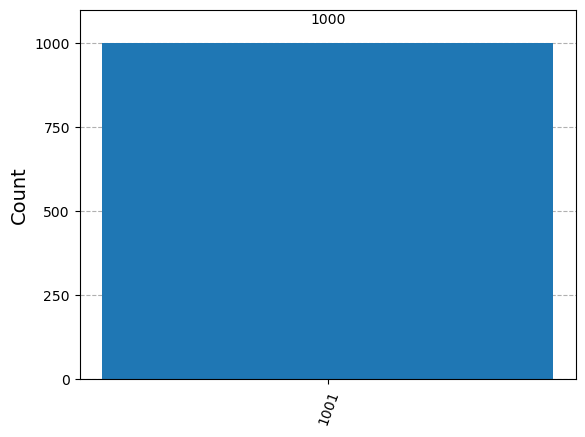

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Dataset L
L = [2, 1]

# Number of qubits needed (2 qubits for each element in L)
num_qubits = len(L) * 2

# Create a quantum circuit with 'num_qubits' qubits and classical bits to store the measurements
qc = QuantumCircuit(num_qubits, num_qubits)

# Apply X gates based on the binary representation of each element in L
for i, num in enumerate(L):
    # Binary representation of the number with 2 qubits
    binary_rep = format(num, '02b')
    
    # Apply X gates based on the binary value ('01', '10', etc.)
    if binary_rep[0] == '1':
        qc.x(2*i)     # Apply X gate to the first qubit (MSB)
    if binary_rep[1] == '1':
        qc.x(2*i + 1) # Apply X gate to the second qubit (LSB)

# Add measurement to all qubits
qc.measure(range(num_qubits), range(num_qubits))

# Execute the circuit on a simulator
simulator = AerSimulator()
job = simulator.run(qc, shots=1000) # Run the circuit 1000 times
result = job.result()

# Get the counts of the measurement outcomes
counts = result.get_counts(qc)

# Display the measurement result as a histogram
plot_histogram(counts)

#qc.draw(output='mpl')

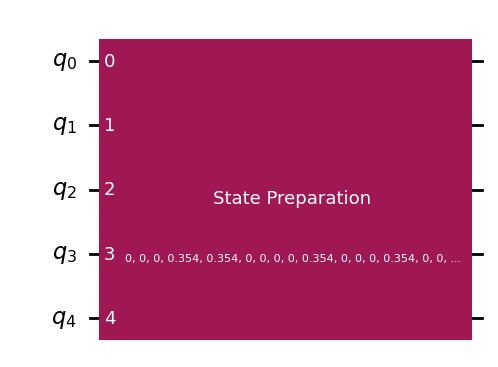

In [15]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import StatePreparation

L = [2, 1, 2, 0, 0, 1, 3, 2]

len_qr1 = int(np.ceil(np.log2(len(L))))
len_qr2 = int(np.log2(max(L))) + 1
num_qubits = len_qr1 + len_qr2
statevector = np.zeros(2**num_qubits)

for i, el in enumerate(L):
    index_reg = '{0:b}'.format(i).zfill(len_qr1)
    element_reg = '{0:b}'.format(el).zfill(len_qr2)
    statevector[int(element_reg + index_reg, 2)] = 1

statevector /= np.linalg.norm(statevector)

qc = QuantumCircuit(num_qubits)
sp = StatePreparation(statevector)
qc.append(sp, range(num_qubits))

qc.draw(output='mpl')